# example from matplotlib

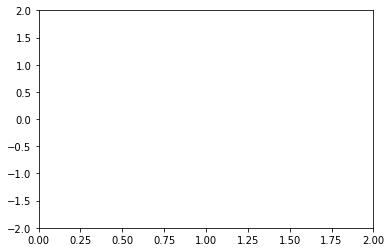

In [49]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML, Image
# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 0, 2))
ax.set_ylim((-2, 2))

scat = ax.scatter([], [], lw=2)

In [50]:
# initialization function: plot the background of each frame
def init():
    scat.set_offsets([])
    return (scat)
# animation function. This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    scat.set_offsets([x, y])
    return (scat)
# call the animator. blit=True means only re-draw the parts that 
# have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)

Traceback (most recent call last):
  File "C:\Users\DuongHung\anaconda3\envs\tf\lib\site-packages\matplotlib\cbook\__init__.py", line 216, in process
    func(*args, **kwargs)
  File "C:\Users\DuongHung\anaconda3\envs\tf\lib\site-packages\matplotlib\animation.py", line 953, in _start
    self._init_draw()
  File "C:\Users\DuongHung\anaconda3\envs\tf\lib\site-packages\matplotlib\animation.py", line 1740, in _init_draw
    for a in self._drawn_artists:
TypeError: 'PathCollection' object is not iterable


In [43]:
anim

C:\Users\DuongHung\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  app.launch_new_instance()


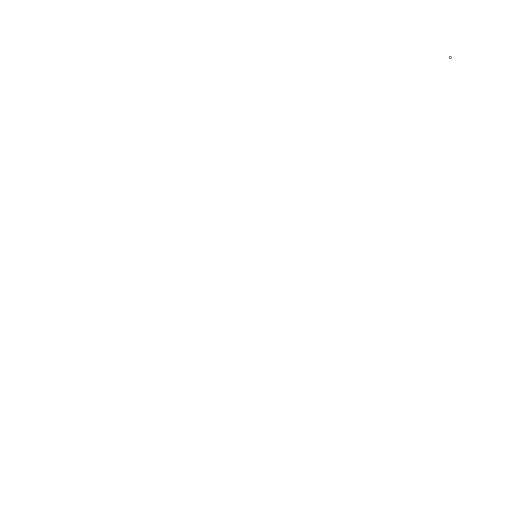

In [55]:
# Fixing random state for reproducibility
np.random.seed(19680801)


# Create new Figure and an Axes which fills it.
fig = plt.figure(figsize=(7, 7))
ax = fig.add_axes([0, 0, 1, 1], frameon=False)
ax.set_xlim(0, 1), ax.set_xticks([])
ax.set_ylim(0, 1), ax.set_yticks([])

# Create rain data
n_drops = 50
rain_drops = np.zeros(n_drops, dtype=[('position', float, 2),
                                      ('size',     float, 1),
                                      ('growth',   float, 1),
                                      ('color',    float, 4)])

# Initialize the raindrops in random positions and with
# random growth rates.
rain_drops['position'] = np.random.uniform(0, 1, (n_drops, 2))
rain_drops['growth'] = np.random.uniform(50, 200, n_drops)

# Construct the scatter which we will update during animation
# as the raindrops develop.
scat = ax.scatter(rain_drops['position'][:, 0], rain_drops['position'][:, 1],
                  s=rain_drops['size'], lw=0.5, edgecolors=rain_drops['color'],
                  facecolors='none')


def update(frame_number):
    # Get an index which we can use to re-spawn the oldest raindrop.
    current_index = frame_number % n_drops

    # Make all colors more transparent as time progresses.
    rain_drops['color'][:, 3] -= 1.0/len(rain_drops)
    rain_drops['color'][:, 3] = np.clip(rain_drops['color'][:, 3], 0, 1)

    # Make all circles bigger.
    rain_drops['size'] += rain_drops['growth']

    # Pick a new position for oldest rain drop, resetting its size,
    # color and growth factor.
    rain_drops['position'][current_index] = np.random.uniform(0, 1, 2)
    rain_drops['size'][current_index] = 5
    rain_drops['color'][current_index] = (0, 0, 0, 1)
    rain_drops['growth'][current_index] = np.random.uniform(50, 200)

    # Update the scatter collection, with the new colors, sizes and positions.
    scat.set_edgecolors(rain_drops['color'])
    scat.set_sizes(rain_drops['size'])
    scat.set_offsets(rain_drops['position'])


# Construct the animation, using the update function as the animation director.
animation = FuncAnimation(fig, update, interval=10)
plt.show()
animation

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [4]:
from io import StringIO
from io import BytesIO
from zipfile import ZipFile
import urllib.request

def zip2df(link):
    # Open the url link
    url = urllib.request.urlopen(link)
    
    # Open as zip file
    with ZipFile(BytesIO(url.read())) as my_zip_file:
        for contained_file in my_zip_file.namelist():
            fzip=my_zip_file.open(contained_file)
            print(contained_file)
            data=fzip.read()
    # Convert bytes object to string object
    s=str(data,'utf-8')
    data = StringIO(s) 
    # convert it to pandas DataFrame as normal csv file
    df=pd.read_csv(data)
    return df

In [7]:
link_0750 = 'https://github.com/duonghung86/Vehicle-trajectory-tracking/raw/master/Data/NGSIM/0750_0805_us101_smoothed_11_.zip'

df=zip2df(link_0750)
df.info()
df.head()

0750_0805_us101_smoothed_11_.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 18 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   Vehicle_ID    1048575 non-null  int64  
 1   Frame_ID      1048575 non-null  int64  
 2   Total_Frames  1048575 non-null  int64  
 3   Global_Time   1048575 non-null  int64  
 4   Local_X       1048575 non-null  float64
 5   Local_Y       1048575 non-null  float64
 6   Global_X      1048575 non-null  float64
 7   Global_Y      1048575 non-null  float64
 8   v_Length      1048575 non-null  float64
 9   v_Width       1048575 non-null  float64
 10  v_Class       1048575 non-null  int64  
 11  v_Vel         1048575 non-null  float64
 12  v_Acc         1048575 non-null  float64
 13  Lane_ID       1048575 non-null  int64  
 14  Preceeding    1048575 non-null  int64  
 15  Following     1048575 non-null  int64  
 16  Space_Hdwy    1048575 non-null  float64

,Vehicle_ID,Frame_ID,Total_Frames,Global_Time,Local_X,Local_Y,Global_X,Global_Y,v_Length,v_Width,v_Class,v_Vel,v_Acc,Lane_ID,Preceeding,Following,Space_Hdwy,Time_Hdwy
0,2,13,437,1118846980200,16.467196,35.380427,6451137.641,1873344.962,14.5,4.9,2,40.000000,0.000000,2,0,0,0.0,0.0
1,2,14,437,1118846980300,16.446594,39.381608,6451140.329,1873342.000,14.5,4.9,2,40.012349,0.123485,2,0,0,0.0,0.0
2,2,15,437,1118846980400,16.425991,43.381541,6451143.018,1873339.038,14.5,4.9,2,39.999855,-0.124939,2,0,0,0.0,0.0
3,2,16,437,1118846980500,16.405392,47.380780,6451145.706,1873336.077,14.5,4.9,2,39.992920,-0.069349,2,0,0,0.0,0.0
4,2,17,437,1118846980600,16.384804,51.379881,6451148.395,1873333.115,14.5,4.9,2,39.991544,-0.013759,2,0,0,0.0,0.0


In [88]:
df[df.Local_Y<250]

,Vehicle_ID,Frame_ID,Total_Frames,Global_Time,Local_X,Local_Y,Global_X,Global_Y,v_Length,v_Width,v_Class,v_Vel,v_Acc,Lane_ID,Preceeding,Following,Space_Hdwy,Time_Hdwy
0,2,13,437,1118846980200,16.467196,35.380427,6451137.641,1873344.962,14.5,4.9,2,40.000000,0.000000,2,0,0,0.00,0.00
1,2,14,437,1118846980300,16.446594,39.381608,6451140.329,1873342.000,14.5,4.9,2,40.012349,0.123485,2,0,0,0.00,0.00
2,2,15,437,1118846980400,16.425991,43.381541,6451143.018,1873339.038,14.5,4.9,2,39.999855,-0.124939,2,0,0,0.00,0.00
3,2,16,437,1118846980500,16.405392,47.380780,6451145.706,1873336.077,14.5,4.9,2,39.992920,-0.069349,2,0,0,0.00,0.00
4,2,17,437,1118846980600,16.384804,51.379881,6451148.395,1873333.115,14.5,4.9,2,39.991544,-0.013759,2,0,0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047926,2783,8054,760,1118847784300,52.588079,234.736937,6451248.559,1873172.822,17.5,5.4,2,30.990285,-3.442600,5,2775,2800,74.54,2.53
1047927,2783,8055,760,1118847784400,52.772100,237.822212,6451250.931,1873170.208,17.5,5.4,2,30.907581,-0.827040,5,2775,2800,74.78,2.42
1047928,2783,8056,760,1118847784500,52.975552,240.928434,6451253.248,1873167.638,17.5,5.4,2,31.128772,2.211906,5,2775,2800,75.08,2.28
1047929,2783,8057,760,1118847784600,53.192152,244.111296,6451255.517,1873165.137,17.5,5.4,2,31.902239,7.734672,5,2775,2800,75.10,2.25


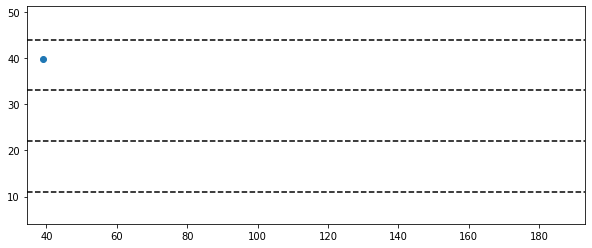

In [100]:
def plot_animation(data):
    # Create new Figure and an Axes which fills it.
    fig, ax = plt.subplots( figsize =(10,4))
    ax.set_ylim(data.Local_X.min(), data.Local_X.max())
    ax.set_xlim(data.Local_Y.min(), data.Local_Y.max())

    # Construct the scatter which we will update during animation
    scat = ax.scatter(data[data.Frame_ID==data.Frame_ID.min()].Local_Y,data[data.Frame_ID==data.Frame_ID.min()].Local_X)
    for i in range(6):
        ax.hlines((i+1)*11,data.Local_Y.min(), data.Local_Y.max(),linestyles='--')
    def update(frame_number):
        scat.set_offsets(data[data.Frame_ID==frame_number][['Local_Y','Local_X']])
    # Construct the animation, using the update function as the animation director.
    animation = FuncAnimation(fig, update, frames=np.arange(data.Frame_ID.min(),data.Frame_ID.max()), interval=50)
    plt.show()
    return animation

plot_animation(df[df.Frame_ID<50])

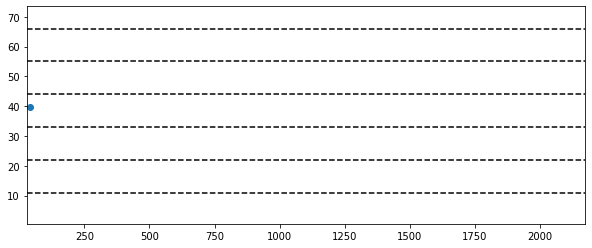

In [101]:
plot_animation(df[df.Frame_ID<500])